In [1]:
!pip install mpl_finance
!pip install --upgrade mplfinance

In [2]:
# First import the libraries that we need to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
from datetime import datetime

In [3]:
bc = pd.read_csv('Data/Binance-Bitcoin.csv', index_col = False)
bc.set_index('Date')
bc

,Date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-08-17 00:00:00.000000000,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999000064,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395
1,2017-08-18 00:00:00.000000000,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999000064,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409
2,2017-08-19 00:00:00.000000000,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999000064,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529
3,2017-08-20 00:00:00.000000000,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999000064,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084
4,2017-08-21 00:00:00.000000000,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999000064,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,2021-12-27 00:00:00.000000000,50775.48,52088.00,50449.00,50701.44,28779.582120,2021-12-27 23:59:59.999000064,1.471424e+09,1009238,14432.910350,7.382075e+08,0.000000
1594,2021-12-28 00:00:00.000000000,50701.44,50704.05,47313.01,47543.74,45853.339240,2021-12-28 23:59:59.999000064,2.242102e+09,1345774,21743.170130,1.063172e+09,0.000000
1595,2021-12-29 00:00:00.000000000,47543.74,48139.08,46096.99,46464.66,39498.870000,2021-12-29 23:59:59.999000064,1.873786e+09,1114074,19089.619100,9.059697e+08,0.000000
1596,2021-12-30 00:00:00.000000000,46464.66,47900.00,45900.00,47120.87,30352.295690,2021-12-30 23:59:59.999000064,1.428756e+09,910157,14886.523750,7.007923e+08,0.000000


In [4]:
#bc = pd.read_csv('Data/Binance-Bitcoin.csv')
#bc

In [5]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1598 non-null   object 
 1   Open                1598 non-null   float64
 2   High                1598 non-null   float64
 3   Low                 1598 non-null   float64
 4   Close               1598 non-null   float64
 5   Volume              1598 non-null   float64
 6   Close Time          1598 non-null   object 
 7   Quote Asset Volume  1598 non-null   float64
 8   Number of Trades    1598 non-null   int64  
 9   TB Base Volume      1598 non-null   float64
 10  TB Quote Volume     1598 non-null   float64
 11  Ignore              1598 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 149.9+ KB


In [6]:
bc.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03,1.598000e+03,1598.000000,1.598000e+03,1598.000000
mean,17402.424625,17926.975113,16804.851615,17429.491527,50345.871711,1.041144e+09,7.551250e+05,25074.633072,5.145131e+08,1578.689645
std,17271.624296,17774.176316,16688.440635,17284.838208,36360.594498,1.401519e+09,7.576345e+05,17663.120062,6.865549e+08,6898.912191
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,9.778657e+05,2.153000e+03,56.190141,2.413638e+05,0.000000
25%,6733.137500,6891.767500,6566.827500,6734.915000,28478.360601,2.129368e+08,2.123935e+05,14472.122580,1.120022e+08,0.000000
50%,9283.610000,9459.320000,9073.170000,9288.930000,43473.899234,4.108919e+08,4.400480e+05,21676.857539,2.032835e+08,0.000000
75%,18509.437500,18949.665000,17868.350000,18623.210000,64634.678766,1.394383e+09,1.113092e+06,31936.220142,6.794935e+08,0.000000
max,67525.820000,69000.000000,66222.400000,67525.830000,402201.673764,1.347769e+10,6.331062e+06,197511.954273,6.410033e+09,76007.970079


In [7]:
#Creates a new column called 'Return' that is the percentage change from the previous column 
#on the adjusted closing price
bc['Return'] = bc['Close'].pct_change()
bc.head()

,Date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore,Return
0,2017-08-17 00:00:00.000000000,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999000064,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395,NaN
1,2017-08-18 00:00:00.000000000,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999000064,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409,-0.041238
2,2017-08-19 00:00:00.000000000,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999000064,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529,0.007694
3,2017-08-20 00:00:00.000000000,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999000064,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084,-0.012969
4,2017-08-21 00:00:00.000000000,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999000064,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970,-0.017201


Text(0.5, 1.0, 'Opening Price vs. Date')

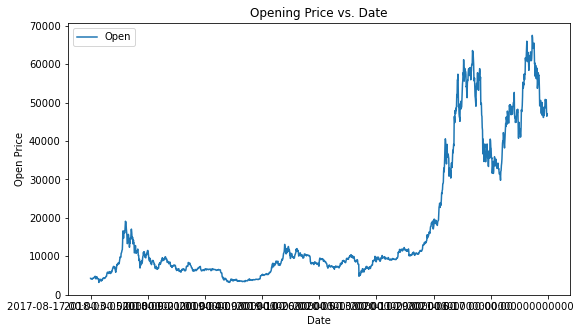

In [8]:
bc.plot('Date', 'Open', figsize = (9,5))
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Opening Price vs. Date')

Text(0.5, 1.0, 'Closing Price vs. Date')

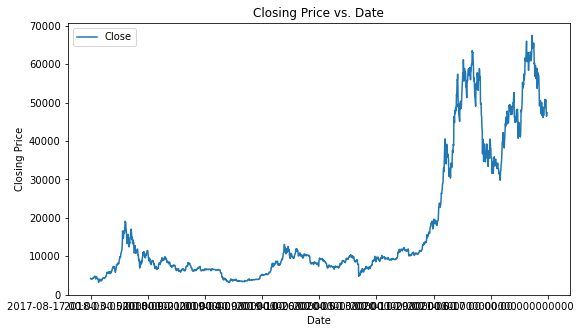

In [9]:
bc.plot('Date', 'Close', figsize = (9,5))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price vs. Date')

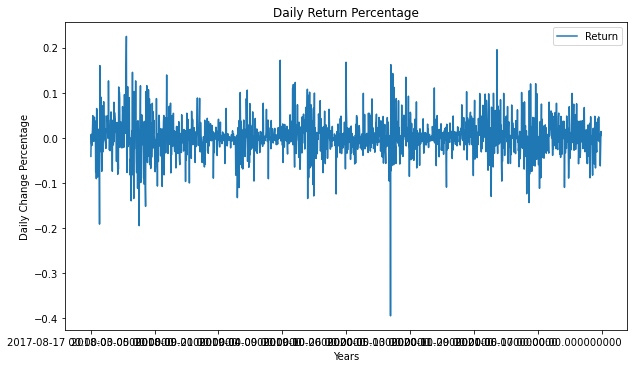

In [10]:
bc.plot('Date', 'Return', figsize=(9,5))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Daily Change Percentage')
plt.title("Daily Return Percentage")
plt.show()

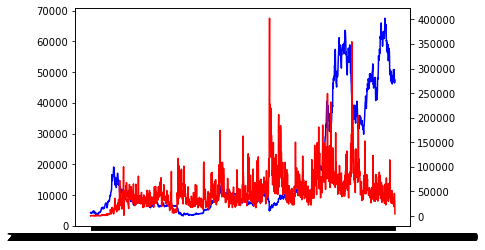

In [11]:
fig, ax = plt.subplots()
ax.plot(bc['Date'], bc['Close'], color = 'blue')
ax2 = ax.twinx()
ax2.plot(bc['Date'], bc['Volume'], color = 'red')
plt.show()

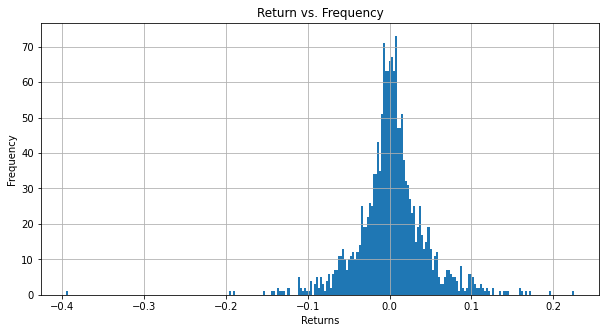

In [12]:
bc.hist('Return', bins = 250, figsize = (10,5))
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Return vs. Frequency')
plt.show()

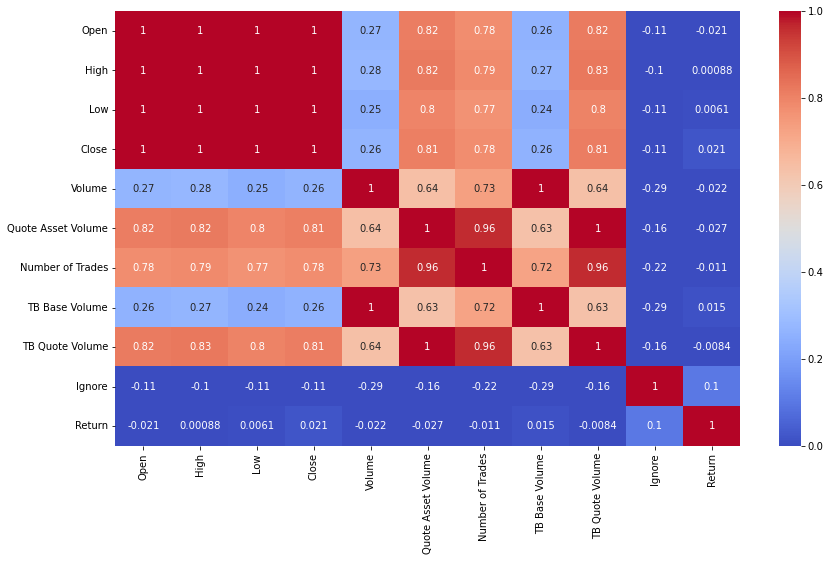

In [13]:
plt.figure(figsize=(14,8))
sns.heatmap(bc.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);

From the heat map, the main attribute of test will be Volume. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B87C52DC10>,
      dtype=object)

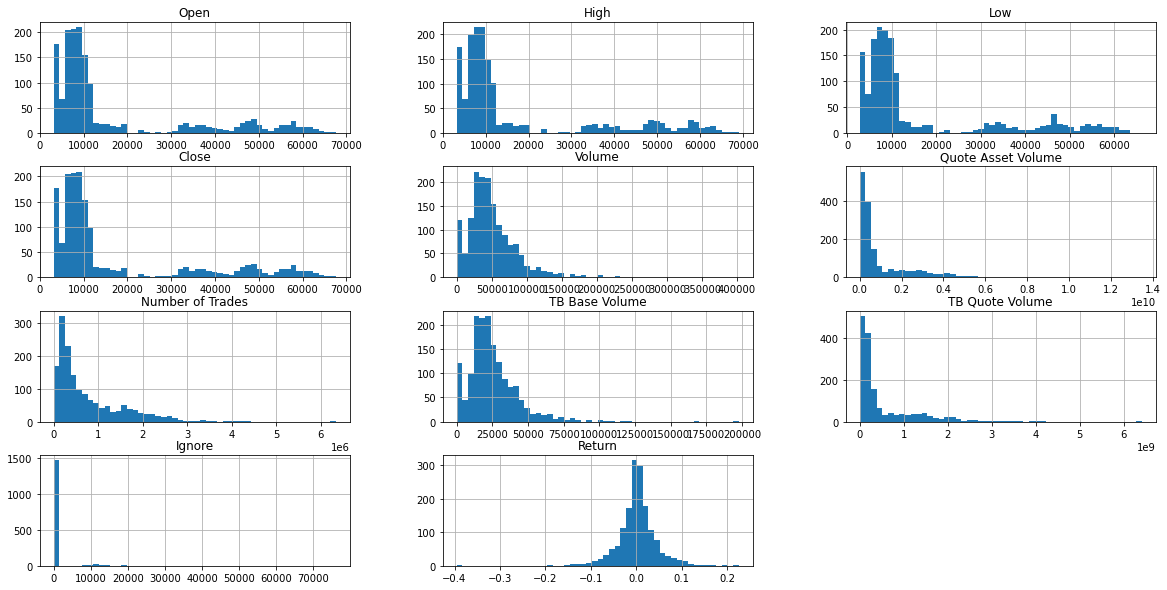

In [14]:
bc.hist(bins = 50, figsize = (20,10))

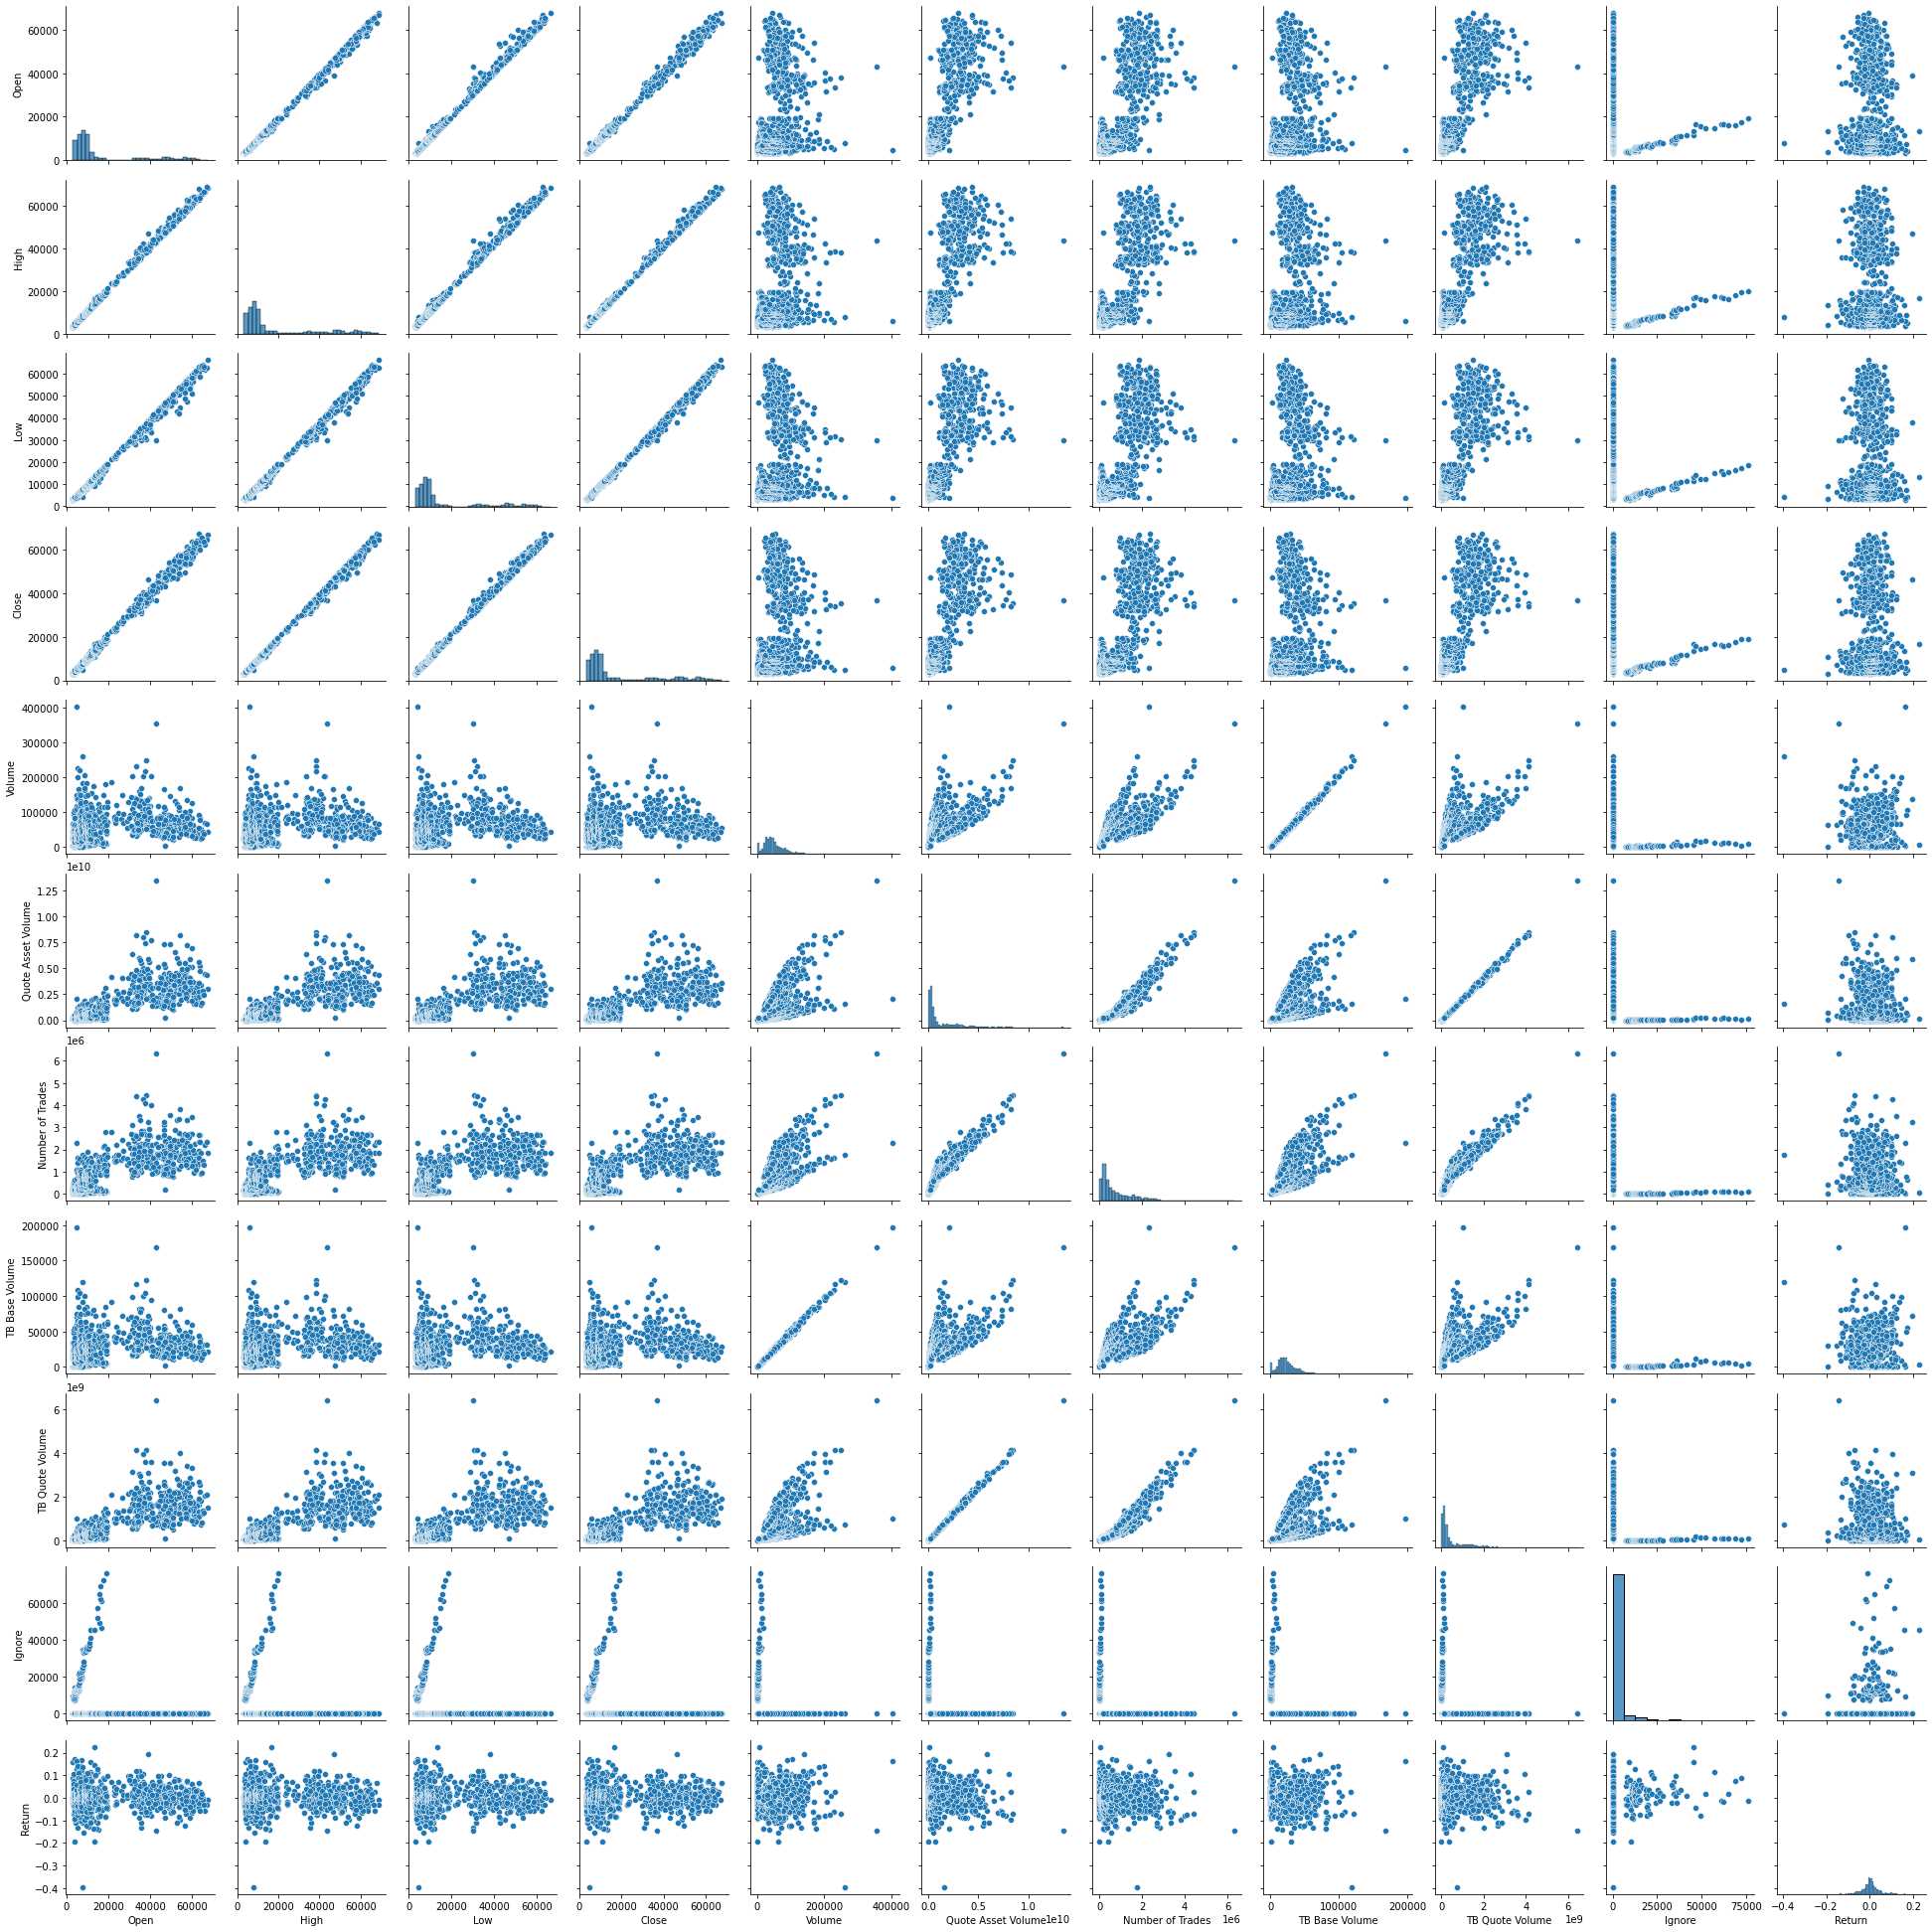

In [15]:
sns.pairplot(bc)

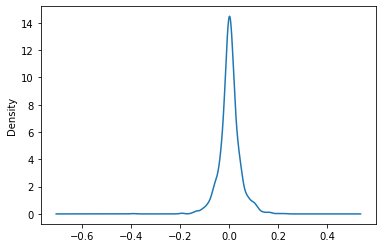

In [16]:
bc['Return'].plot(kind = 'kde')

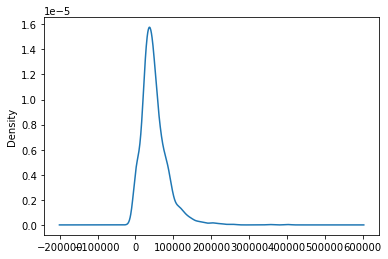

In [17]:
bc['Volume'].plot(kind = 'kde')

C:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


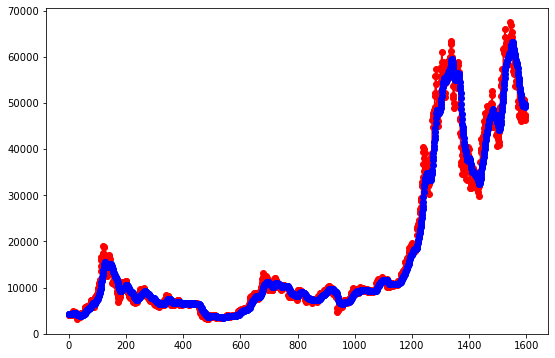

In [18]:
#exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(bc['Close']).fit(smoothing_level = 0.1, optimized = False)

bc['Close'].plot(marker = 'o', color = 'red', figsize = (9,6))
model.fittedvalues.plot(marker = 'o', color ='blue')

The model line is a really good fit for the data. Further statsmodels prediction can be done with Arima

In [19]:
from pandas.plotting import lag_plot

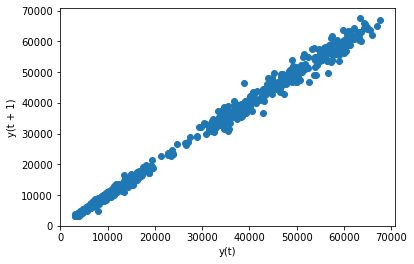

In [20]:
lag_plot(bc['Close'])

This shows that the data are strongly non-random and further suggests that an autoregressive model might be appropriate. The tighter the data is clustered around the diagonal, the more autocorrelation is present.

A stationary time series is one whose properties do not depend on the time at which the series is observed. Bitcoin value varies to highly due to multiple factors such as social medica and government policy. 

In [21]:
#Create a column to return the day of the week matching the date

bc['Date'] = pd.to_datetime(bc['Date']) #Had to redo otherwise errors appeared
week={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
bc['Day of Week'] = bc['Date'].dt.dayofweek.map(week)

bc.head()

,Date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore,Return,Day of Week
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999000064,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395,NaN,Thu
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999000064,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409,-0.041238,Fri
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999000064,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529,0.007694,Sat
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999000064,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084,-0.012969,Sun
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999000064,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970,-0.017201,Mon


A positive linear trend is suggestive of positive autocorrelation.
The tighter the data is clustered around the diagonal, the more autocorrelation is present.

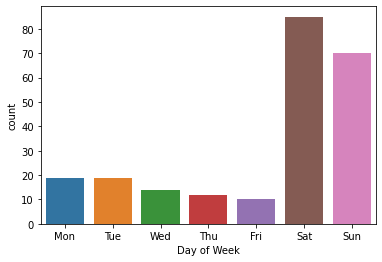

In [22]:
bc['Date'] = pd.to_datetime(bc['Date']) #Had to redo otherwise errors appeared

# count min value for each week day
idx = bc.groupby([pd.Grouper(key='Date', freq='W-MON')])['Volume'].transform(min) == bc['Volume']

# calculate data for days.
# W-MON = weekly frequency (Mondays)
lows_count = bc[idx].groupby([pd.Grouper(key='Date', freq='D')]).first().reset_index()
lows_count = lows_count.dropna()


sns.countplot(x='Day of Week',data=lows_count, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

I wanted to see which days had the largest trading volumes, and we see that those days are Saturday and Sunday

In [23]:
import mplfinance as mpf

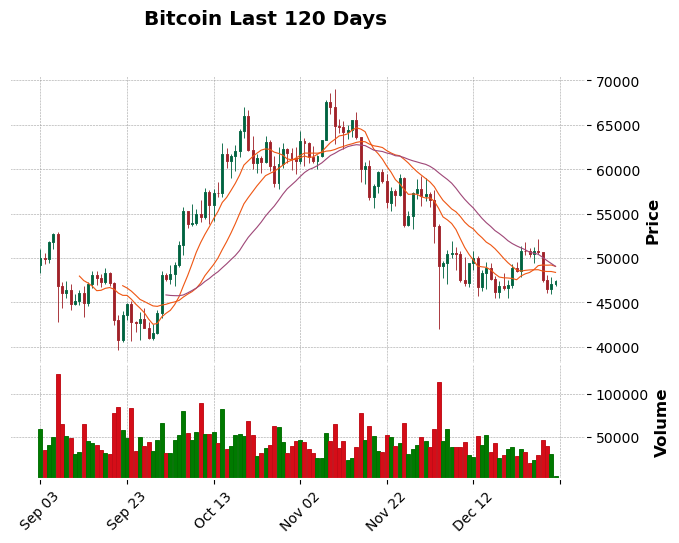

In [24]:
#Limit data so that it becomes easier to see
mpf.plot(bc.set_index('Date').tail(120), 
        type='candle', style='charles', volume=True, 
        title='Bitcoin Last 120 Days', mav=(10,20,30)) #moving average

From the last 120 days, we see the price continues to fluctuate. A decrease in price occurred during the month of September 2021 and has since been on the rise again. 

In [25]:
bc.to_csv(r'Data/Binance-BC-EDA.csv', index = False)